# Notebook to select features before modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import gc
import warnings
import os
import time

from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

#warnings.simplefilter(action='ignore', category=FutureWarning)

# print the list of data csv files we have downloaded
print(os.listdir("../Projet+Mise+en+prod+-+home-credit-default-risk"))

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))



['application_test.csv', '.DS_Store', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', 
                                                                          ascending=False).round(1)
          #  mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
       # '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
# reading in the data 
# main_model_df = pd.read_csv("../my_csv_files/df_for_modelling.csv")
# main_model_df.shape

In [5]:
# main_model_df[main_model_df['TARGET'].notnull()].shape

In [6]:
# main_model_df[main_model_df['TARGET'].notnull()].columns

In [7]:
# reading in the data obtained in the projet7_kaggle_file.ipynb
main_model_df = pd.read_csv("../my_csv_files/MY_merged_train.csv")
main_model_df.shape

(307507, 799)

In [90]:
main_model_df[~main_model_df.isin([np.inf, -np.inf]).any(1)]

,Unnamed: 0,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,0,100002,1.0,0,0,0,0,202500.0,406597.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,100004,0.0,0,1,0,0,67500.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,100006,0.0,1,0,0,0,135000.0,312682.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,4,100007,0.0,0,0,0,0,121500.0,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,307506,307506,456251,0.0,0,0,1,0,157500.0,254700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307503,307507,307507,456252,0.0,1,0,0,0,72000.0,269550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307504,307508,307508,456253,0.0,1,0,0,0,153000.0,677664.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307505,307509,307509,456254,1.0,1,0,0,0,171000.0,370107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
main_model_df.columns

Index(['Unnamed: 0', 'index', 'SK_ID_CURR', 'TARGET', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=799)

In [8]:
# Missing values statistics for the data 

missing_values = missing_values_table(main_model_df[~main_model_df.isin([np.inf, -np.inf]).any(1)])
missing_values.to_csv("../my_csv_files/missing_values.csv")
missing_values.head(20)

Your selected dataframe has 799 columns.
There are 610 columns that have missing values.


,Missing Values,% of Total Values
REFUSED_AMT_DOWN_PAYMENT_MEAN,262324,85.3
REFUSED_RATE_DOWN_PAYMENT_MEAN,262324,85.3
REFUSED_RATE_DOWN_PAYMENT_MAX,262324,85.3
REFUSED_RATE_DOWN_PAYMENT_MIN,262324,85.3
REFUSED_AMT_DOWN_PAYMENT_MIN,262324,85.3
REFUSED_AMT_DOWN_PAYMENT_MAX,262324,85.3
REFUSED_APP_CREDIT_PERC_VAR,258332,84.0
CC_AMT_PAYMENT_CURRENT_VAR,246871,80.3
CC_CNT_DRAWINGS_OTHER_CURRENT_VAR,246797,80.3
CC_CNT_DRAWINGS_POS_CURRENT_VAR,246797,80.3


In [84]:
missing_values.tail(547)

,Missing Values,% of Total Values
APPROVED_APP_CREDIT_PERC_VAR,94258,30.7
ACTIVE_AMT_CREDIT_SUM_MEAN,90353,29.4
ACTIVE_AMT_CREDIT_SUM_MAX,90353,29.4
ACTIVE_DAYS_CREDIT_MEAN,90352,29.4
ACTIVE_DAYS_CREDIT_UPDATE_MEAN,90352,29.4
...,...,...
ORGANIZATION_TYPE_Electricity,0,0.0
ORGANIZATION_TYPE_Culture,0,0.0
ORGANIZATION_TYPE_Construction,0,0.0
ORGANIZATION_TYPE_Cleaning,0,0.0


In [131]:
missing_values.tail(448)

,Missing Values,% of Total Values
PREV_RATE_DOWN_PAYMENT_MIN,33902,11.0
PREV_RATE_DOWN_PAYMENT_MAX,33902,11.0
PREV_RATE_DOWN_PAYMENT_MEAN,33902,11.0
PREV_AMT_DOWN_PAYMENT_MIN,33902,11.0
APPROVED_AMT_GOODS_PRICE_MAX,18424,6.0
...,...,...
ORGANIZATION_TYPE_Electricity,0,0.0
ORGANIZATION_TYPE_Culture,0,0.0
ORGANIZATION_TYPE_Construction,0,0.0
ORGANIZATION_TYPE_Cleaning,0,0.0


In [85]:
# features that have the least missing values, for feature selection combining least missing values 
# and most important features
data_for_feat_selec1 = missing_values.tail(546)

# Preparing the df for hyperparameter search and modelling 

In [26]:
import re

# Divide in training/validation and test data
main_model_df = main_model_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

train_df = main_model_df[main_model_df['TARGET'].notnull()]
test_df = main_model_df[main_model_df['TARGET'].isnull()]


In [27]:
print(train_df.shape)

(307507, 799)


In [28]:
train_df[~train_df.isin([np.nan, np.inf, -np.inf]).any(1)]
train_df[train_df.isin([np.inf, -np.inf]).any(1)].to_csv("../my_csv_files/data_with_inf.csv")

In [29]:
train_df = train_df[~train_df.isin([np.inf, -np.inf]).any(1)]
train_df.shape

(307488, 799)

In [30]:
# Cross validation model
#if stratified:
#    folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
#else:
#    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    
# Create arrays and dataframes to store results
feats = [f for f in train_df.columns if f not in ['TARGET', 'Unnamed: 0', 'Unnamed0',
                                                  'SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

# Sklearn stuff
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load and split dataset
#x, y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(train_df[feats], train_df['TARGET'], 
                                                    test_size=0.3, random_state = 22)


In [31]:
test_df

,Unnamed0,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT


In [32]:
del test_df
gc.collect()

169

## Hyperparameter Search: from hyperopt

In [33]:
from sklearn.metrics import confusion_matrix
import numpy as np

def my_comp_score(y_true, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    tn_weight = 1
    fp_weight = 0
    fn_weight = -10
    tp_weight = 0

    # gain function for company, true positives and false positives don't matter that much to us
    # we want to penalise the false negatives, and we want to say yes to true negatives
    gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)
    
    # best represents scenario where there are no false negatives or false postives
    # so all false positives would be correctly shown as negative
    # and all false negatives would be correctly show as positive
    best = (tn + fp) * tn_weight + (tp + fn) * tp_weight
    
    # baseline is a naive model that predicts non default(negative) for everyone
    # but all true positives and false negatives would be incorrectly shown as negative
    baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight
    
    score = (gain - baseline) / (best - baseline)
    
    return score



def my_comp_score_probs(y_true, y_pred):
    
    # for now y_pred is the probability that the value is 1
    y_use = [1 if i >= 0.5 else 0 for i in y_pred]
    
    y_use = pd.Series(y_use)

    tn, fp, fn, tp = confusion_matrix(y_true, y_use).ravel()
    
    tn_weight = 1
    fp_weight = 0
    fn_weight = -10
    tp_weight = 0

    # gain function for company, true positives and false positives don't matter that much to us
    # we want to penalise the false negatives, and we want to say yes to true negatives
    gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)
    
    # best represents scenario where there are no false negatives or false postives
    # so all false positives would be correctly shown as negative
    # and all false negatives would be correctly show as positive
    best = (tn + fp) * tn_weight + (tp + fn) * tp_weight
    
    # baseline is a naive model that predicts non default(negative) for everyone
    # but all true positives and false negatives would be incorrectly shown as negative
    baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight
    
    score = ((gain - baseline) / (best - baseline))

    return score

In [34]:
from sklearn.metrics import fbeta_score, make_scorer

#make_scorer(my_comp_score)

In [35]:
from hyperopt import fmin, tpe, hp, anneal, Trials
# HyperOpt: Optimizer
from hyperopt import tpe

kf = KFold(n_splits = 5)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def gb_mse_cv(params, random_state = 22, cv = kf, X = x_train, y= y_train):
    # the function gets a set of variable parameters in "param"
    params = {'learning_rate': params['learning_rate'],
              'num_leaves': int(params['num_leaves']),
              'subsample' : params['subsample'],
              'max_depth': int(params['max_depth']),
              'reg_alpha' : params['reg_alpha'],
              'reg_lambda' : params['reg_lambda'],
              'min_child_weight': int(params['min_child_weight']),
              'min_data_in_leaf': int(params['min_data_in_leaf']),
              'min_split_gain' :  params['min_split_gain']
              }
    
    # we use this params to create a new LGBM Regressor
    model = LGBMClassifier(random_state = random_state, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring= make_scorer(my_comp_score_probs, 
                                                                      needs_proba= True), n_jobs=-1).mean()

    return score


In [37]:
%%time

n_iter = 50

# possible values of parameters
space = {'learning_rate': hp.loguniform('learning_rate', -5, 0),
         'num_leaves' : hp.quniform('num_leaves', 2, 40, 1),
         'subsample' : hp.loguniform('subsample', -4, 0),
         'max_depth' : hp.quniform('max_depth', 2, 14, 1),
         'reg_alpha' : hp.loguniform('reg_alpha', -4, 0),
         'reg_lambda' : hp.loguniform('reg_lambda', -4, 0),
         'min_child_weight': hp.quniform('min_child_weight', 2, 40, 1),
         'min_data_in_leaf': hp.quniform('min_data_in_leaf', 2, 40, 1),
         'min_split_gain' : hp.loguniform('min_split_gain', -4, 0)
        }

# trials will contain logging information
trials = Trials()

best=fmin(fn = gb_mse_cv, # function to optimize
          space = space, 
          algo = tpe.suggest, # optimization algorithm, hyperopt will select its parameters 
                              # automatically
          max_evals = n_iter, # maximum number of iterations
          trials = trials, # logging
          rstate = np.random.RandomState(58) # fixing random state for the reproducibility
         )


# computing the score on the test set
model = LGBMClassifier(random_state = 54,
                       learning_rate = best['learning_rate'],
                       num_leaves = int(best['num_leaves']), 
                       subsample = best['subsample'],
                       max_depth = int(best['max_depth']),
                       reg_alpha = best['reg_alpha'],
                       reg_lambda = best['reg_lambda'],
                       min_child_weight = int(best['min_child_weight']),
                       min_data_in_leaf = int(best['min_data_in_leaf']),
                       min_split_gain = best['min_split_gain']
                       )


model.fit(x_train, y_train)

print("Best  {:.3f} params {}".format( gb_mse_cv(best), best))


100%|██████████| 50/50 [1:25:39<00:00, 102.79s/trial, best loss: -0.10207440867505949]
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
Best  -0.102 params {'learning_rate': 0.9763692875848224, 'max_depth': 14.0, 'min_child_weight': 33.0, 'min_data_in_leaf': 38.0, 'min_split_gain': 0.8166374491909313, 'num_leaves': 27.0, 'reg_alpha': 0.08056700366596325, 'reg_lambda': 0.29203945463099873, 'subsample': 0.13557955312019507}
CPU times: user 1min 27s, sys: 47.1 s, total: 2min 15s
Wall time: 1h 27min 41s


In [38]:
print("Best  {:.3f} params {}".format( gb_mse_cv(best), best))

Best  -0.102 params {'learning_rate': 0.9763692875848224, 'max_depth': 14.0, 'min_child_weight': 33.0, 'min_data_in_leaf': 38.0, 'min_split_gain': 0.8166374491909313, 'num_leaves': 27.0, 'reg_alpha': 0.08056700366596325, 'reg_lambda': 0.29203945463099873, 'subsample': 0.13557955312019507}


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

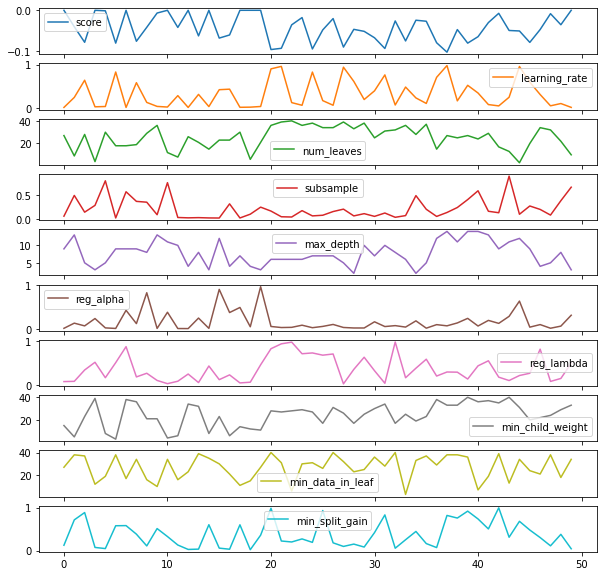

In [39]:
#tpe_test_score=mean_squared_error(x_test, model.predict(y_test))

tpe_results = np.array([[x['result']['loss'],
                         x['misc']['vals']['learning_rate'][0],
                         x['misc']['vals']['num_leaves'][0],
                         x['misc']['vals']['subsample'][0],
                         x['misc']['vals']['max_depth'][0],
                         x['misc']['vals']['reg_alpha'][0],
                         x['misc']['vals']['reg_lambda'][0],
                         x['misc']['vals']['min_child_weight'][0],
                         x['misc']['vals']['min_data_in_leaf'][0],
                         x['misc']['vals']['min_split_gain'][0]] for x in trials.trials])

tpe_results_df = pd.DataFrame(tpe_results,
                           columns=['score', 
                                    'learning_rate', 
                                    'num_leaves',
                                    'subsample',
                                    'max_depth',
                                    'reg_alpha',
                                    'reg_lambda',
                                    'min_child_weight',
                                    'min_data_in_leaf',
                                    'min_split_gain'])
                                    
tpe_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
model

In [31]:
import pickle
import joblib

#+ "/classification/models/"
#model, vectorizer_model = train_test_model(data["text"], data["category"])
joblib.dump(model, "../Models/hyperpar_search_lgbm_thresh03model.sav")
#joblib.dump(vectorizer_model, model_path+"vectorizer.sav")
print ("====done saving into pickle using Joblib!====")

pickle.dump(model, open("../Models/hyperpar_search_lgbm_thresh03model.pickle", 'wb'))
#pickle.dump(vectorizer_model, open(model_path+"vectorizer.pickle", "wb"))
print ("====done saving into pickle using Pickle!====")

====done saving into pickle using Joblib!====
====done saving into pickle using Pickle!====


In [ ]:
def loading_pickle(model_path):
    #vectorizer = pickle.load(open(model_path+"vectorizer.pickle",'rb'))
    model = pickle.load(open(model_path+"model.pickle",'rb'))
    return model
    #return vectorizer, model


def loading_joblibPickle(model_path):
    #vectorizer = joblib.load(model_path+"vectorizer.sav")
    model = joblib.load(model_path+"model.sav")
    return model 
    #return vectorizer, model

In [ ]:
loading_pickle(model_path)

## Launching the model

In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np

def my_comp_score_lgbm(y_true, y_pred):
    
    # for now y_pred is the probability that the value is 1
    y_use = [1 if i >= 0.5 else 0 for i in y_pred]
    
    y_use = pd.Series(y_use)

    tn, fp, fn, tp = confusion_matrix(y_true, y_use).ravel()
    
    tn_weight = 1
    fp_weight = 0
    fn_weight = -10
    tp_weight = 0

    # gain function for company, true positives and false positives don't matter that much to us
    # we want to penalise the false negatives, and we want to say yes to true negatives
    gain = tp*(tp_weight) + tn*(tn_weight) + fp*(fp_weight) + fn*(fn_weight)
    
    # best represents scenario where there are no false negatives or false postives
    # so all false positives would be correctly shown as negative
    # and all false negatives would be correctly show as positive
    best = (tn + fp) * tn_weight + (tp + fn) * tp_weight
    
    # baseline is a naive model that predicts non default(negative) for everyone
    # but all true positives and false negatives would be incorrectly shown as negative
    baseline = (tn + fp) * tn_weight + (tp + fn) * fn_weight
    
    score = ((gain - baseline) / (best - baseline))

    return 'my score', score, True

In [41]:
# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('../lgbm_importances02.png')

In [42]:
#main_model_df

In [43]:
import re

num_folds= 10
stratified= False
#debug= debug

# Divide in training/validation and test data
#main_model_df = main_model_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

train_df = main_model_df[main_model_df['TARGET'].notnull()]
test_df = main_model_df[main_model_df['TARGET'].isnull()]

#del main_model_df
gc.collect()

# Cross validation model
if stratified:
    folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
else:
    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    
# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
#sub_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()

# Create arrays and dataframes to store results
feats = [f for f in train_df.columns if f not in ['TARGET', 'Unnamed: 0', 'Unnamed0',
                                                  'SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]


In [52]:
#Best  -0.089 params {'learning_rate': 0.6558478063333454, 'max_depth': 5.0, 'min_data_in_leaf': 21.0, 
# 'n_estimators': 784.0, 'num_leaves': 33.0}

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
    train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
    valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]
    
    train_x.to_csv("../my_csv_files/MY_train_x.csv")
    valid_x.to_csv("../my_csv_files/MY_valid_x.csv")
    valid_y.to_csv("../my_csv_files/MY_valid_y.csv")

   ##LightGBM parameters found by Bayesian optimization, Kaggle version
   #clf = LGBMClassifier(
   #    nthread=4,
   #    n_estimators=10000,
   #    learning_rate=0.02,
   #    num_leaves=34,
   #    colsample_bytree=0.9497036,
   #    subsample=0.8715623,
   #    max_depth=8,
   #    reg_alpha=0.041545473,
   #    reg_lambda=0.0735294,
   #    min_split_gain=0.0222415,
   #    min_child_weight=39.3259775,
   #    silent=-1,
   #    verbose=-1, )
    
    # Light GBM parameters found by my hyperparameter search
    clf = LGBMClassifier(
        nthread=4,
        n_estimators=10000,
        learning_rate = 0.9763692875848224,
        num_leaves = 27,
        max_depth = 14,
        reg_alpha = 0.08056700366596325,
        reg_lambda = 0.29203945463099873,
        min_data_in_leaf = 38,
        subsample = 0.13557955312019507,      
        min_child_weight = 33,
        min_split_gain = 0.8166374491909313,
        silent=-1,
        verbose=-1,)

    clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            verbose= 200, early_stopping_rounds= 200, eval_metric = my_comp_score_lgbm)

    oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
    #sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
    


Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.13768	training's my score: 0.457503	valid_1's binary_logloss: 0.341007	valid_1's my score: 0.103398
Early stopping, best iteration is:
[10]	training's binary_logloss: 0.240281	training's my score: 0.0817157	valid_1's binary_logloss: 0.257446	valid_1's my score: 0.0678906
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
Training until validation scores don't improve for 200 rounds
[200]	training's binary_logloss: 0.138406	training's my score: 0.458954	valid_1's binary_logloss: 0.332293	valid_1's my score: 0.0960919
Early stopping, best iteration is:
[7]	training's binary_logloss: 0.245146	training's my score: 0.0649331	valid_1's binary_logloss: 0.251759	valid_1's my score: 0.0531426
[LightGBM] [Warning]

In [55]:
valid_preds = clf.predict(valid_x, num_iteration = clf.best_iteration_)
valid_preds_proba = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf.feature_importances_
fold_importance_df["fold"] = n_fold + 1
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis = 0)
#print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
#del clf, train_x, train_y, valid_x, valid_y
#gc.collect()

In [56]:
clf.best_iteration_

10

In [32]:
import pickle
import joblib

joblib.dump(clf, "../Models/lgbm__trained_my_score03.sav")
pickle.dump(clf, open("../Models/lgbm_trained_my_score03.pickle", 'wb'))


In [8]:
# binary logloss version of LGBM

import pickle
import joblib

joblib.load("../Models/lgbm__trained_my_hypers_my_scorer1.sav")


LGBMClassifier(learning_rate=0.7, max_depth=7, min_data_in_leaf=35,
               min_split_gain=0.10084477620937958, n_estimators=10000,
               nthread=4, num_leaves=32, reg_lambda=0.8748371874180665,
               silent=-1, subsample=0.5685052618291946, verbose=-1)

In [57]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[28002,   295],
       [ 2245,   208]])

In [108]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[28111,   180],
       [ 2345,   112]])

In [46]:
from sklearn.metrics import confusion_matrix
conf_lgm = confusion_matrix(valid_y, valid_preds)
conf_lgm

array([[28086,   105],
       [ 2427,   133]])

In [ ]:
#joblib.load('../Models/model_lgbm_my_hypers_my_scorer.pickle')

In [80]:
feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", 
                                                                                       ascending=False)[:130]

feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", 
                                                                                       ascending=False)[:128].to_csv("../my_csv_files/feats_importance_model_lgbm.csv")

In [130]:
# old feature importance 

#feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", 
#                                                                                       ascending=False)[:55]

,importance
feature,
EXT_SOURCE_2,15.0
EXT_SOURCE_3,11.0
EXT_SOURCE_1,9.0
DAYS_EMPLOYED,6.0
PAYMENT_RATE,4.0
PREV_CNT_PAYMENT_MEAN,4.0
ANNUITY_INCOME_PERC,3.0
DAYS_BIRTH,3.0
AMT_ANNUITY,3.0


In [79]:
feats_import_old_version = ["EXT_SOURCE_2", "EXT_SOURCE_3", "EXT_SOURCE_1", "DAYS_EMPLOYED", "PAYMENT_RATE", 
                            "PREV_CNT_PAYMENT_MEAN",
                            "ANNUITY_INCOME_PERC", "DAYS_BIRTH", "AMT_ANNUITY", "INSTAL_DPD_MEAN", 
                            "CC_CNT_DRAWINGS_ATM_CURRENT_MEAN", "REG_CITY_NOT_LIVE_CITY", "ACTIVE_DAYS_CREDIT_MAX", 
                            "BURO_AMT_CREDIT_SUM_SUM", "APPROVED_CNT_PAYMENT_MEAN", 
    "INSTAL_AMT_PAYMENT_SUM", "PREV_NAME_YIELD_GROUP_low_action_MEAN", "POS_SK_DPD_DEF_MEAN", 
    "BURO_AMT_CREDIT_SUM_DEBT_MEAN", "BURO_AMT_CREDIT_SUM_DEBT_MAX", "INSTAL_DAYS_ENTRY_PAYMENT_MAX", 
                            "FLAG_DOCUMENT_3", "BURO_CREDIT_ACTIVE_Closed_MEAN", 
                            "CC_AMT_PAYMENT_TOTAL_CURRENT_MAX",
    "INSTAL_AMT_PAYMENT_MEAN", "APPROVED_APP_CREDIT_PERC_MIN", "OWN_CAR_AGE", "INSTAL_AMT_INSTALMENT_MAX",
                            "APPROVED_AMT_DOWN_PAYMENT_MAX", "PREV_APP_CREDIT_PERC_MIN", 
                            "PREV_APP_CREDIT_PERC_MEAN",
    "APPROVED_DAYS_DECISION_MIN", "CODE_GENDER", "PREV_NAME_CONTRACT_STATUS_Refused_MEAN",
    "APPROVED_APP_CREDIT_PERC_MAX", "INSTAL_PAYMENT_PERC_SUM", "INSTAL_DAYS_ENTRY_PAYMENT_MEAN", 
                            "POS_SK_DPD_DEF_MAX", "CC_CNT_DRAWINGS_CURRENT_MAX", "CC_CNT_DRAWINGS_CURRENT_VAR",
    "INSTAL_PAYMENT_PERC_MEAN", "BURO_DAYS_CREDIT_MAX", "TOTALAREA_MODE", "DEF_60_CNT_SOCIAL_CIRCLE",
                            "NAME_FAMILY_STATUS_Married", "AMT_CREDIT", "AMT_GOODS_PRICE", 
                            "NAME_EDUCATION_TYPE_Highereducation", "BURO_CREDIT_TYPE_Microloan_MEAN",
                            "NAME_EDUCATION_TYPE_Secondarysecondaryspecial"]

pd.DataFrame(feats_import_old_version).to_csv("../my_csv_files/feats_import_old_version.csv")

In [75]:
feats_import_old_version

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'DAYS_EMPLOYED',
 'PAYMENT_RATE',
 'PREV_CNT_PAYMENT_MEAN',
 'ANNUITY_INCOME_PERC',
 'DAYS_BIRTH',
 'AMT_ANNUITY',
 'INSTAL_DPD_MEAN',
 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN',
 'REG_CITY_NOT_LIVE_CITY',
 'ACTIVE_DAYS_CREDIT_MAX',
 'BURO_AMT_CREDIT_SUM_SUM',
 'APPROVED_CNT_PAYMENT_MEAN',
 'INSTAL_AMT_PAYMENT_SUM',
 'PREV_NAME_YIELD_GROUP_low_action_MEAN',
 'POS_SK_DPD_DEF_MEAN',
 'BURO_AMT_CREDIT_SUM_DEBT_MEAN',
 'BURO_AMT_CREDIT_SUM_DEBT_MAX',
 'INSTAL_DAYS_ENTRY_PAYMENT_MAX',
 'FLAG_DOCUMENT_3',
 'BURO_CREDIT_ACTIVE_Closed_MEAN',
 'CC_AMT_PAYMENT_TOTAL_CURRENT_MAX',
 'INSTAL_AMT_PAYMENT_MEAN',
 'APPROVED_APP_CREDIT_PERC_MIN',
 'OWN_CAR_AGE',
 'INSTAL_AMT_INSTALMENT_MAX',
 'APPROVED_AMT_DOWN_PAYMENT_MAX',
 'PREV_APP_CREDIT_PERC_MIN',
 'PREV_APP_CREDIT_PERC_MEAN',
 'APPROVED_DAYS_DECISION_MIN',
 'CODE_GENDER',
 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN',
 'APPROVED_APP_CREDIT_PERC_MAX',
 'INSTAL_PAYMENT_PERC_SUM',
 'INSTAL_DAYS_ENTRY_PAYMENT

In [77]:
pd.Series(list(set(feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", 
                                                                                       ascending=False)[:128].index) & set(feats_import_old_version)))

0                                     DAYS_EMPLOYED
1                                   INSTAL_DPD_MEAN
2                                        AMT_CREDIT
3                                      PAYMENT_RATE
4                         APPROVED_CNT_PAYMENT_MEAN
5                                   AMT_GOODS_PRICE
6                       CC_CNT_DRAWINGS_CURRENT_VAR
7                                      EXT_SOURCE_2
8                          INSTAL_PAYMENT_PERC_MEAN
9                        NAME_FAMILY_STATUS_Married
10                                  FLAG_DOCUMENT_3
11                               POS_SK_DPD_DEF_MAX
12                  BURO_CREDIT_TYPE_Microloan_MEAN
13                                     EXT_SOURCE_1
14                                       DAYS_BIRTH
15                   INSTAL_DAYS_ENTRY_PAYMENT_MEAN
16                           ACTIVE_DAYS_CREDIT_MAX
17    NAME_EDUCATION_TYPE_Secondarysecondaryspecial
18                        PREV_APP_CREDIT_PERC_MEAN
19          

In [91]:
data_for_feat_selec2 =  feature_importance_df[["feature", "importance"]].groupby("feature").mean()\
                          .sort_values(by="importance", ascending=False)[:128].index

missing_vals_under30_perc = data_for_feat_selec1.index

pd.DataFrame(missing_vals_under30_perc).to_csv("../my_csv_files/feats_missing_vals_under30_perc.csv")

In [97]:
pd.Series(list(set(data_for_feat_selec2) & set(missing_vals_under30_perc)))
pd.Series(list(set(data_for_feat_selec2) & set(missing_vals_under30_perc)))
# & set(feats_import_old_version)

0                            INSTAL_DPD_MEAN
1                            AMT_GOODS_PRICE
2                               EXT_SOURCE_2
3                  ACTIVE_AMT_CREDIT_SUM_MAX
4                 ACTIVE_AMT_CREDIT_SUM_MEAN
                       ...                  
79                   INSTAL_PAYMENT_PERC_SUM
80                            INSTAL_DBD_MAX
81                    CLOSED_DAYS_CREDIT_MIN
82    PREV_NAME_CONTRACT_STATUS_Refused_MEAN
83            PREV_NAME_PORTFOLIO_Cards_MEAN
Length: 84, dtype: object

In [98]:
# create csv file with features that are both low in missing values and have a 
# high importance
pd.Series(list(set(data_for_feat_selec2) & set(missing_vals_under30_perc))).to_csv("../my_csv_files/feats_import_combined_lgbm128_mssing.csv")

In [99]:
# Read the dataframe

# feat_imp1 = pd.read_csv("../my_csv_files/feats_for_models1.csv")


In [100]:
# (pd.Series(list(feat_imp2["imp_feats"]) + list(feat_imp1["imp_feats"]))).value_counts().to_csv("../my_csv_files/combined_feats_for_models1.csv")